In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
data_df=pd.read_csv('Cust_Spend_Data_New.csv')

In [17]:
data_df.shape

(829, 7)

In [18]:
data_df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17


In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [20]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,829.0,415.000000,239.455981,1.0,208.0,415.0,622.0,829.0
Avg_Mthly_Spend,829.0,4801.276236,2056.494189,549.0,4156.0,4516.0,4910.0,10000.0
No_Of_Visits,829.0,17.856454,4.367192,2.0,15.0,18.0,20.0,29.0
Apparel_Items,829.0,3.961399,2.056204,0.0,3.0,4.0,5.0,10.0
FnV_Items,829.0,7.623643,3.665773,1.0,6.0,7.0,8.0,19.0
Staples_Items,829.0,8.338963,4.250284,0.0,5.0,8.0,10.0,20.0


In [21]:
data_df.isnull().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [22]:
data_df.duplicated().sum()

0

In [23]:
# As we will not be using 'Cust_ID' and 'Name' columns so we are droping them
data_df = data_df.drop(['Cust_ID','Name'],axis=1)

In [24]:
data_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [25]:
# Scaling
from sklearn.preprocessing import StandardScaler

In [28]:
x=StandardScaler()
scaled_df=x.fit_transform(data_df)
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
k_means=KMeans(n_clusters=2)

In [46]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [34]:
k_means.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [47]:
k_means.inertia_

2225.8180780994676

In [48]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
k_means.inertia_

1074.382380298951

In [49]:
k_means=KMeans(n_clusters=4)
k_means.fit(scaled_df)
k_means.inertia_

909.4453294086202

In [50]:
k_means=KMeans(n_clusters=5)
k_means.fit(scaled_df)
k_means.inertia_

813.1990732162741

In [51]:
k_means=KMeans(n_clusters=6)
k_means.fit(scaled_df)
k_means.inertia_

697.7964308882448

In [52]:
wss=[]

In [53]:
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [43]:
wss

[4145.000000000001,
 2225.8180780994676,
 1074.382380298951,
 909.4495242917949,
 784.5624359391797,
 715.356757392934,
 628.7760818567642,
 581.1764268827552,
 539.8978973974271,
 508.18775243792163]

<Axes: >

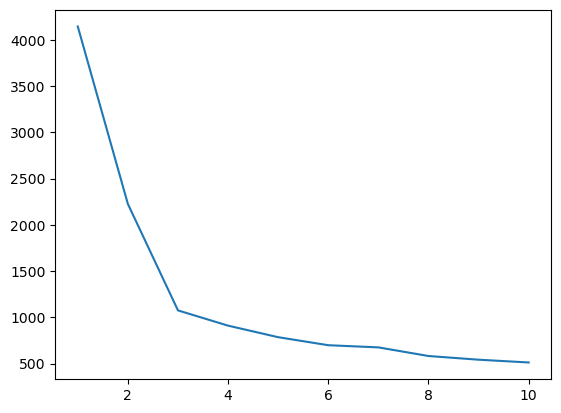

In [56]:
sns.lineplot(x=range(1,11),y=wss)

As we can see from above lineplot there is no significant drop from 3 therefore we will choose number of clusters as 3

In [59]:
k_means=KMeans(n_clusters=3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [60]:
labels

array([1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2,
       0, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 0,

In [61]:
data_df['Clust_kmeans']=labels

In [62]:
data_df.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clust_kmeans
0,1123,28,1,16,14,1
1,9818,13,5,2,5,2
2,9824,10,10,2,2,2
3,3097,23,2,8,9,0
4,817,28,1,17,17,1
5,3039,21,1,8,12,0
6,4676,22,3,8,13,0
7,7869,14,6,3,3,2
8,5585,21,2,10,12,0
9,4589,23,2,8,9,0


In [64]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [67]:
silhouette_score(scaled_df,labels)

0.5863370901372584

In [68]:
sil_width = silhouette_samples(scaled_df,labels)
sil_width

array([0.65605464, 0.51242446, 0.58238018, 0.37519676, 0.70316661,
       0.21533883, 0.40883241, 0.53016965, 0.36212368, 0.46435202,
       0.53273181, 0.38251421, 0.45638838, 0.54265228, 0.59946695,
       0.58742145, 0.70669699, 0.52804742, 0.50993649, 0.51621198,
       0.46439947, 0.45916516, 0.43727811, 0.66885372, 0.58985762,
       0.61143772, 0.29967741, 0.62514869, 0.64122086, 0.67914798,
       0.69348064, 0.41267202, 0.69288439, 0.0820282 , 0.67147334,
       0.65179887, 0.55169861, 0.19310875, 0.57929786, 0.66911281,
       0.54933109, 0.61843536, 0.64293749, 0.64770225, 0.61059923,
       0.42515881, 0.55014745, 0.62945221, 0.4170128 , 0.51390593,
       0.0763273 , 0.61962009, 0.07671105, 0.57562558, 0.47135448,
       0.49643811, 0.68152376, 0.6270269 , 0.37620108, 0.54238286,
       0.39114866, 0.65826701, 0.61888157, 0.62445611, 0.52587586,
       0.23652939, 0.30229326, 0.65941125, 0.67937278, 0.56388553,
       0.60899332, 0.58244297, 0.39735031, 0.4988705 , 0.65145

In [69]:
data_df['sil_width']=sil_width

In [71]:
data_df.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clust_kmeans,sil_width
0,1123,28,1,16,14,1,0.656055
1,9818,13,5,2,5,2,0.512424
2,9824,10,10,2,2,2,0.582380
3,3097,23,2,8,9,0,0.375197
4,817,28,1,17,17,1,0.703167
5,3039,21,1,8,12,0,0.215339
6,4676,22,3,8,13,0,0.408832
7,7869,14,6,3,3,2,0.530170
8,5585,21,2,10,12,0,0.362124
9,4589,23,2,8,9,0,0.464352


In [73]:
silhouette_samples(scaled_df,labels).min()

0.04131038567750352

Save this above data into new excel sheet

In [74]:
data_df.to_csv('kmean_csv')